In [1]:
import pandas as pd


data = pd.read_csv("analysis.csv")

In [2]:
data.head()

,model,dataset,max_tokes,initial_accuracy,n_incorrect_answer,n_corrected_answer,posthint_accuracy
0,DeepSeek-R1-0528-Qwen3-8B,aqua,1024,0.645669,90,7,0.077778
1,DeepSeek-R1-0528-Qwen3-8B,aqua,2048,0.799213,51,1,0.019608
2,DeepSeek-R1-0528-Qwen3-8B,ar_lsat,1024,0.195652,185,16,0.086486
3,DeepSeek-R1-0528-Qwen3-8B,ar_lsat,2048,0.343478,151,29,0.192053
4,DeepSeek-R1-0528-Qwen3-8B,asdiv,1024,0.853683,296,159,0.537162


In [3]:
# use only max_tokens 1024, 2048
data = data[data['max_tokes'].isin([1024, 2048])]
data.head()

,model,dataset,max_tokes,initial_accuracy,n_incorrect_answer,n_corrected_answer,posthint_accuracy
0,DeepSeek-R1-0528-Qwen3-8B,aqua,1024,0.645669,90,7,0.077778
1,DeepSeek-R1-0528-Qwen3-8B,aqua,2048,0.799213,51,1,0.019608
2,DeepSeek-R1-0528-Qwen3-8B,ar_lsat,1024,0.195652,185,16,0.086486
3,DeepSeek-R1-0528-Qwen3-8B,ar_lsat,2048,0.343478,151,29,0.192053
4,DeepSeek-R1-0528-Qwen3-8B,asdiv,1024,0.853683,296,159,0.537162


In [4]:
MODELS_NON_REASONING=[
  "google/gemma-2-2b-it",
  "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "microsoft/Phi-4-mini-instruct",
  "Qwen/Qwen2.5-Math-1.5B",
  "Qwen/Qwen2.5-Math-7B"
]

MODELS_REASONING=[
  "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
  "deepseek-ai/DeepSeek-R1-0528-Qwen3-8B",
  "deepseek-ai/DeepSeek-R1-Distill-Llama-8B",
  "microsoft/Phi-4-mini-reasoning"
]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Add model category column
def categorize_model(model_name):
    reasoning_keywords = ['DeepSeek-R1', 'Phi-4-mini-reasoning']
    for keyword in reasoning_keywords:
        if keyword in model_name:
            return 'Reasoning'
    return 'Non-Reasoning'

data['model_category'] = data['model'].apply(categorize_model)

# Simplify model names for better visualization
def simplify_model_name(model_name):
    # Extract the last part after the last slash or dash
    if '/' in model_name:
        return model_name.split('/')[-1]
    return model_name

data['model_short'] = data['model'].apply(simplify_model_name)

# Note: posthint_accuracy represents the correction rate - 
# the percentage of initially incorrect answers that were corrected after receiving a hint


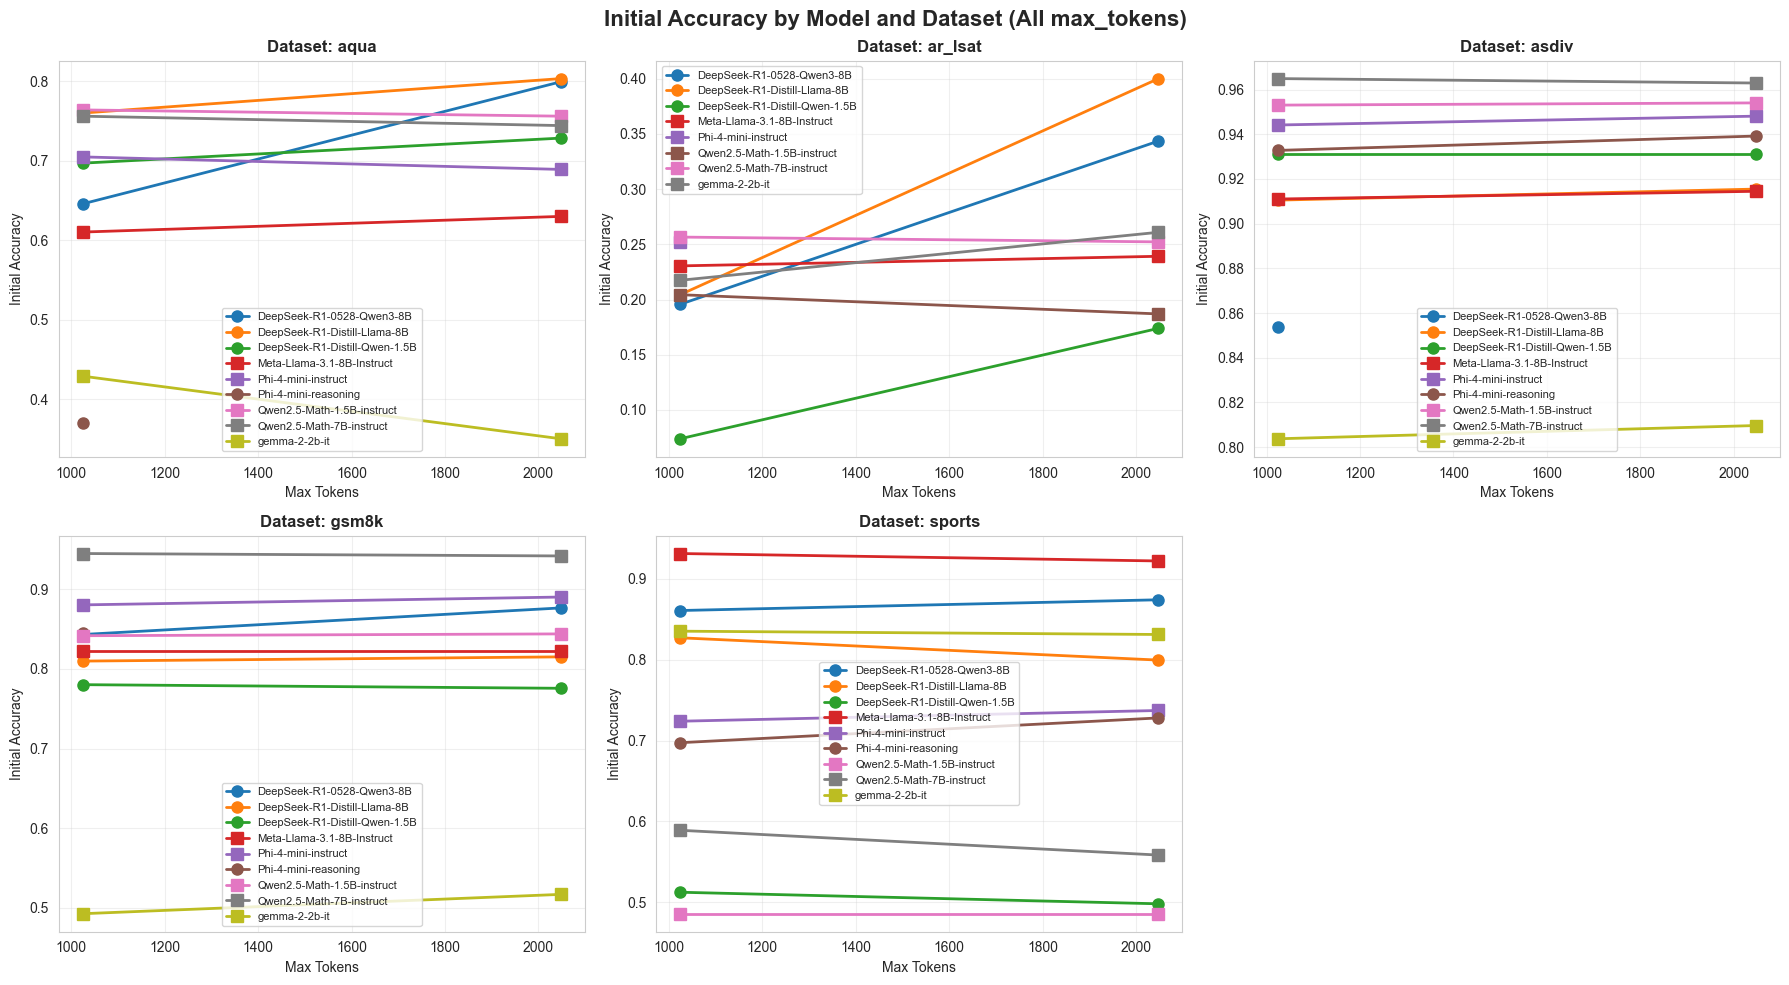

In [6]:
# 1. Initial Accuracy by Model and Dataset (Non-Aggregated)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Initial Accuracy by Model and Dataset (All max_tokens)', fontsize=16, fontweight='bold')

datasets = data['dataset'].unique()
for idx, dataset in enumerate(datasets):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    dataset_data = data[data['dataset'] == dataset]
    
    # Group by model and max_tokens
    for model in dataset_data['model_short'].unique():
        model_data = dataset_data[dataset_data['model_short'] == model]
        model_category = model_data['model_category'].iloc[0]
        marker = 'o' if model_category == 'Reasoning' else 's'
        ax.plot(model_data['max_tokes'], model_data['initial_accuracy'], 
                marker=marker, label=model, linewidth=2, markersize=8)
    
    ax.set_xlabel('Max Tokens', fontsize=10)
    ax.set_ylabel('Initial Accuracy', fontsize=10)
    ax.set_title(f'Dataset: {dataset}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(datasets), 6):
    row = idx // 3
    col = idx % 3
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


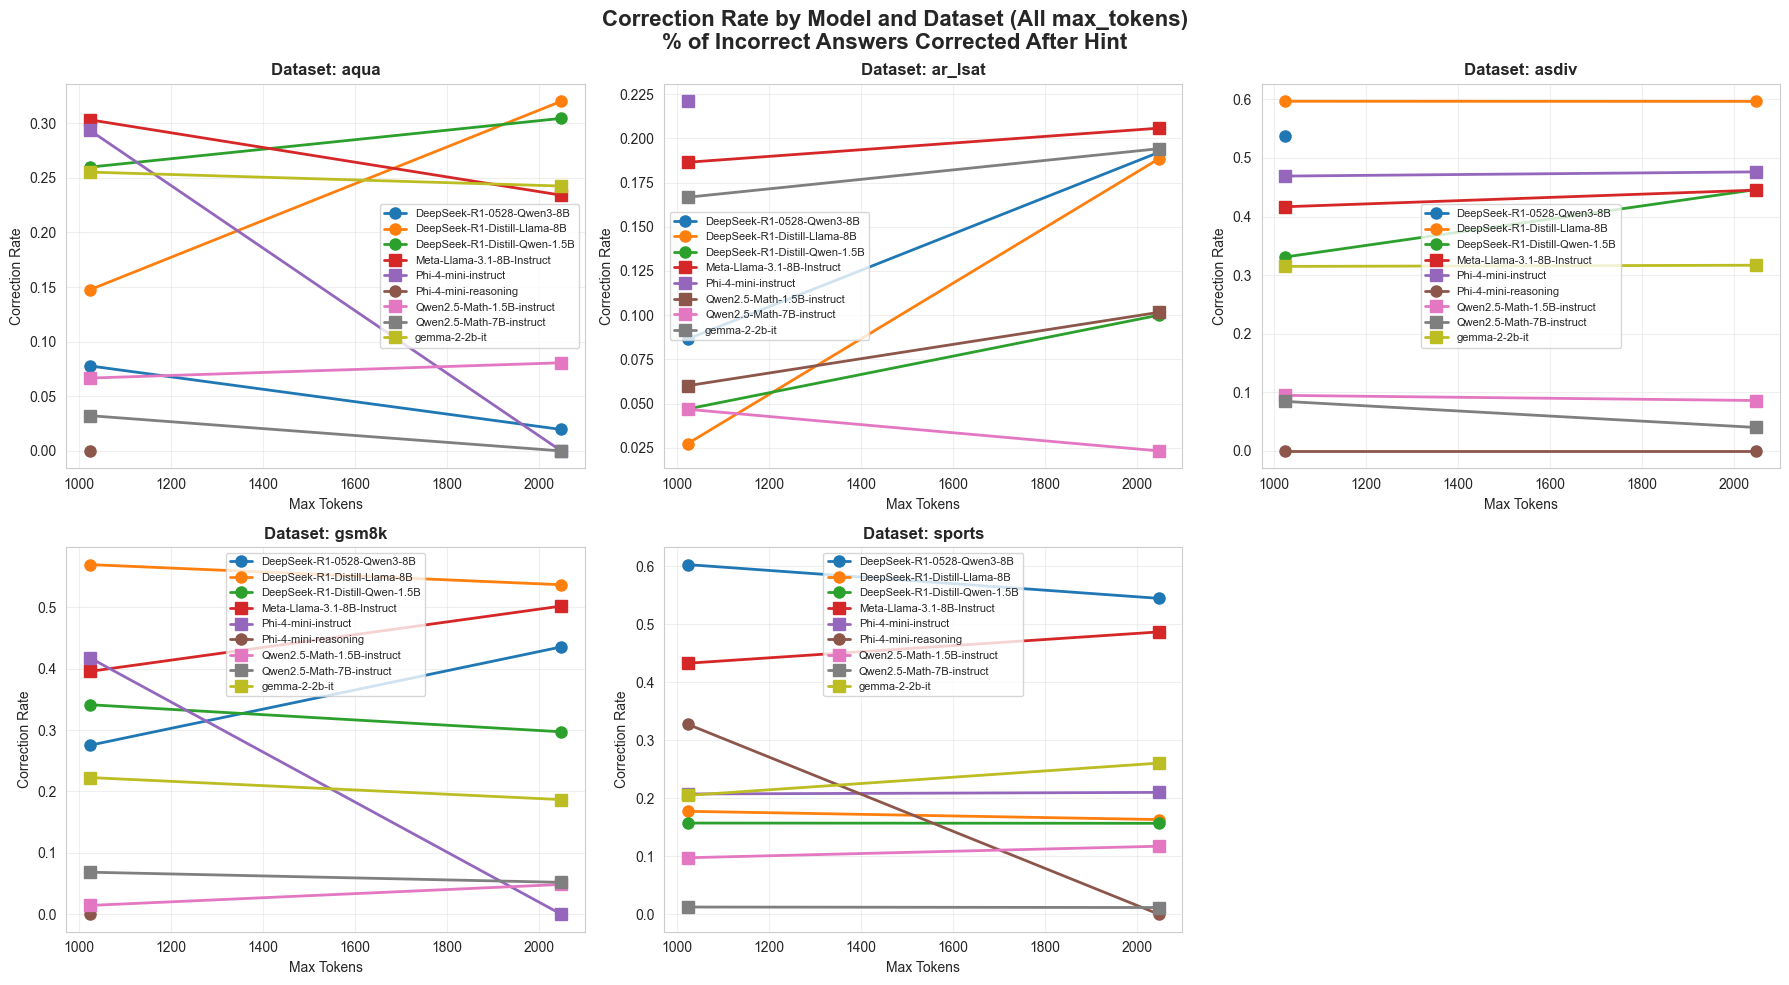

In [7]:
# 2. Correction Rate by Model and Dataset (Non-Aggregated)
# Note: posthint_accuracy = % of initially incorrect answers that were corrected
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Correction Rate by Model and Dataset (All max_tokens)\n% of Incorrect Answers Corrected After Hint', fontsize=16, fontweight='bold')

for idx, dataset in enumerate(datasets):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    dataset_data = data[data['dataset'] == dataset]
    
    for model in dataset_data['model_short'].unique():
        model_data = dataset_data[dataset_data['model_short'] == model]
        model_category = model_data['model_category'].iloc[0]
        marker = 'o' if model_category == 'Reasoning' else 's'
        ax.plot(model_data['max_tokes'], model_data['posthint_accuracy'], 
                marker=marker, label=model, linewidth=2, markersize=8)
    
    ax.set_xlabel('Max Tokens', fontsize=10)
    ax.set_ylabel('Correction Rate', fontsize=10)
    ax.set_title(f'Dataset: {dataset}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(datasets), 6):
    row = idx // 3
    col = idx % 3
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


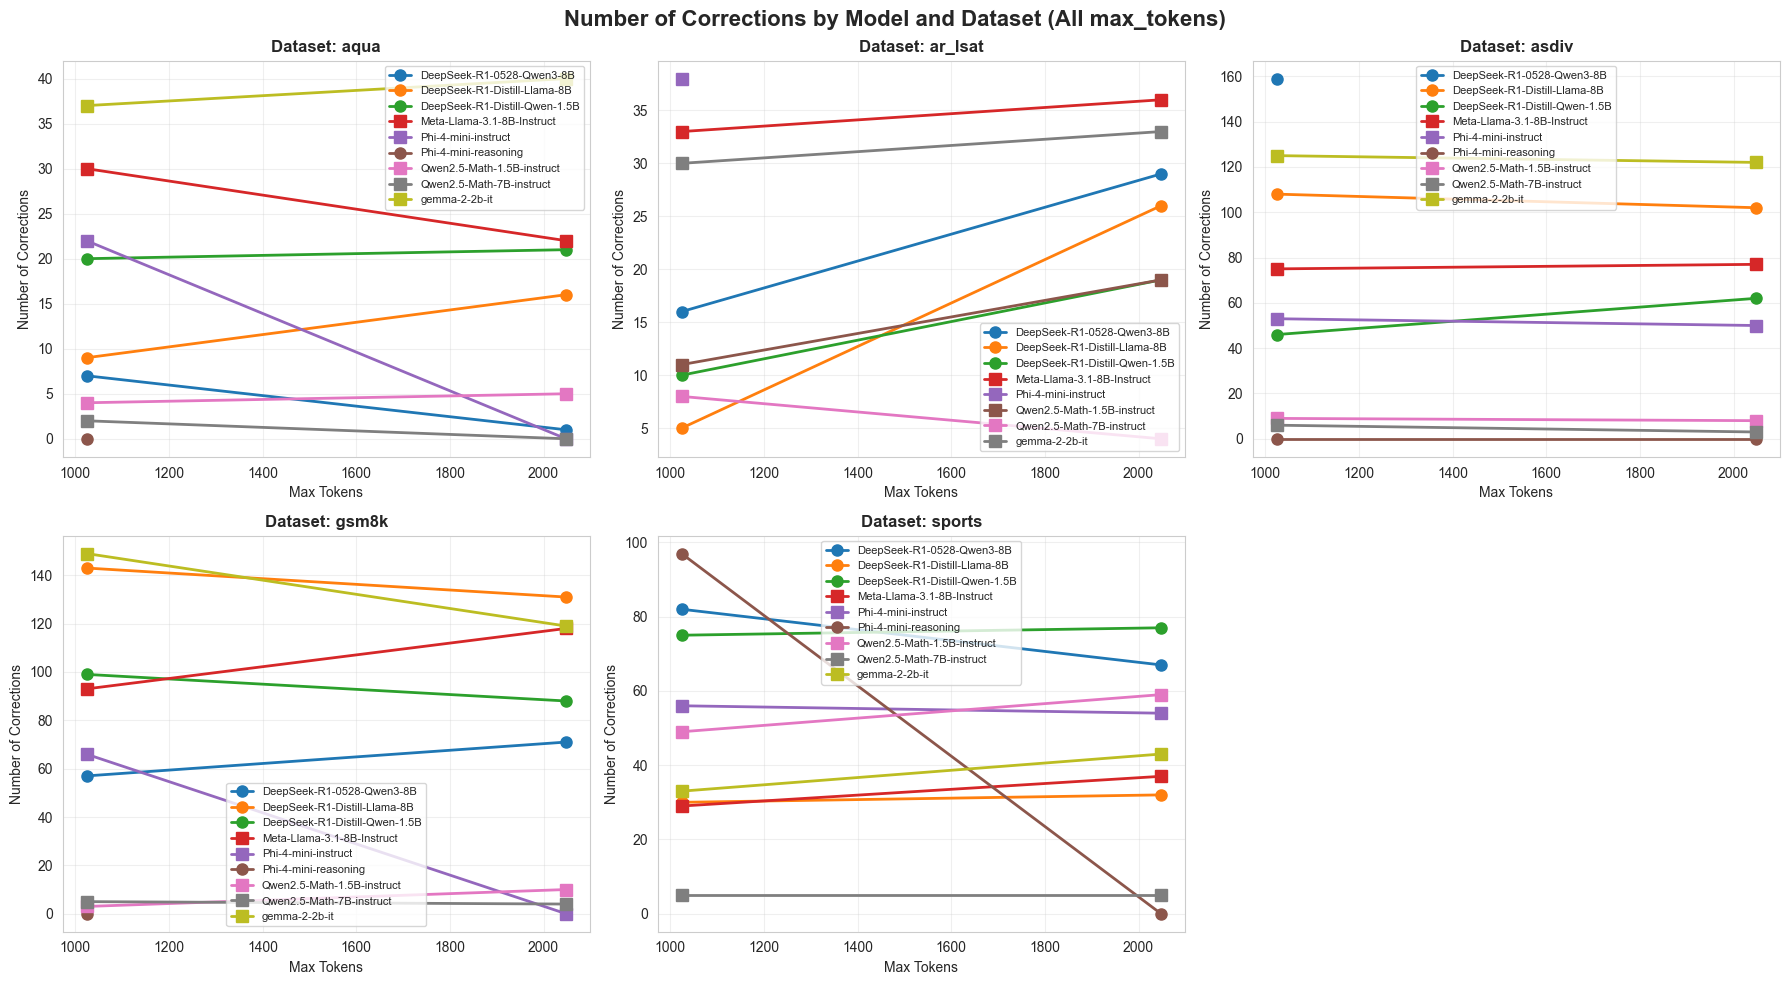

In [ ]:
# 3. Number of Corrections by Model and Dataset (Non-Aggregated)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Number of Corrections by Model and Dataset (All max_tokens)', fontsize=16, fontweight='bold')

for idx, dataset in enumerate(datasets):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    dataset_data = data[data['dataset'] == dataset]
    
    for model in dataset_data['model_short'].unique():
        model_data = dataset_data[dataset_data['model_short'] == model]
        model_category = model_data['model_category'].iloc[0]
        marker = 'o' if model_category == 'Reasoning' else 's'
        ax.plot(model_data['max_tokes'], model_data['n_corrected_answer'], 
                marker=marker, label=model, linewidth=2, markersize=8)
    
    ax.set_xlabel('Max Tokens', fontsize=10)
    ax.set_ylabel('Number of Corrections', fontsize=10)
    ax.set_title(f'Dataset: {dataset}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(datasets), 6):
    row = idx // 3
    col = idx % 3
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [9]:
# 4. Aggregated Analysis - Average across all max_tokens for each model-dataset combination
aggregated_data = data.groupby(['model_short', 'dataset', 'model_category']).agg({
    'initial_accuracy': 'mean',
    'posthint_accuracy': 'mean',  # This is the correction rate (% incorrect corrected)
    'n_incorrect_answer': 'sum',
    'n_corrected_answer': 'sum'
}).reset_index()

# Rename for clarity
aggregated_data.rename(columns={'posthint_accuracy': 'correction_rate'}, inplace=True)

print("Aggregated Data Summary:")
print(aggregated_data.head(10))


Aggregated Data Summary:
                    model_short  dataset model_category  initial_accuracy  \
0     DeepSeek-R1-0528-Qwen3-8B     aqua      Reasoning          0.722441   
1     DeepSeek-R1-0528-Qwen3-8B  ar_lsat      Reasoning          0.269565   
2     DeepSeek-R1-0528-Qwen3-8B    asdiv      Reasoning          0.853683   
3     DeepSeek-R1-0528-Qwen3-8B    gsm8k      Reasoning          0.859743   
4     DeepSeek-R1-0528-Qwen3-8B   sports      Reasoning          0.867587   
5  DeepSeek-R1-Distill-Llama-8B     aqua      Reasoning          0.781497   
6  DeepSeek-R1-Distill-Llama-8B  ar_lsat      Reasoning          0.302174   
7  DeepSeek-R1-Distill-Llama-8B    asdiv      Reasoning          0.913000   
8  DeepSeek-R1-Distill-Llama-8B    gsm8k      Reasoning          0.812358   
9  DeepSeek-R1-Distill-Llama-8B   sports      Reasoning          0.813395   

   correction_rate  n_incorrect_answer  n_corrected_answer  
0         0.048693                 141                   8  
1    

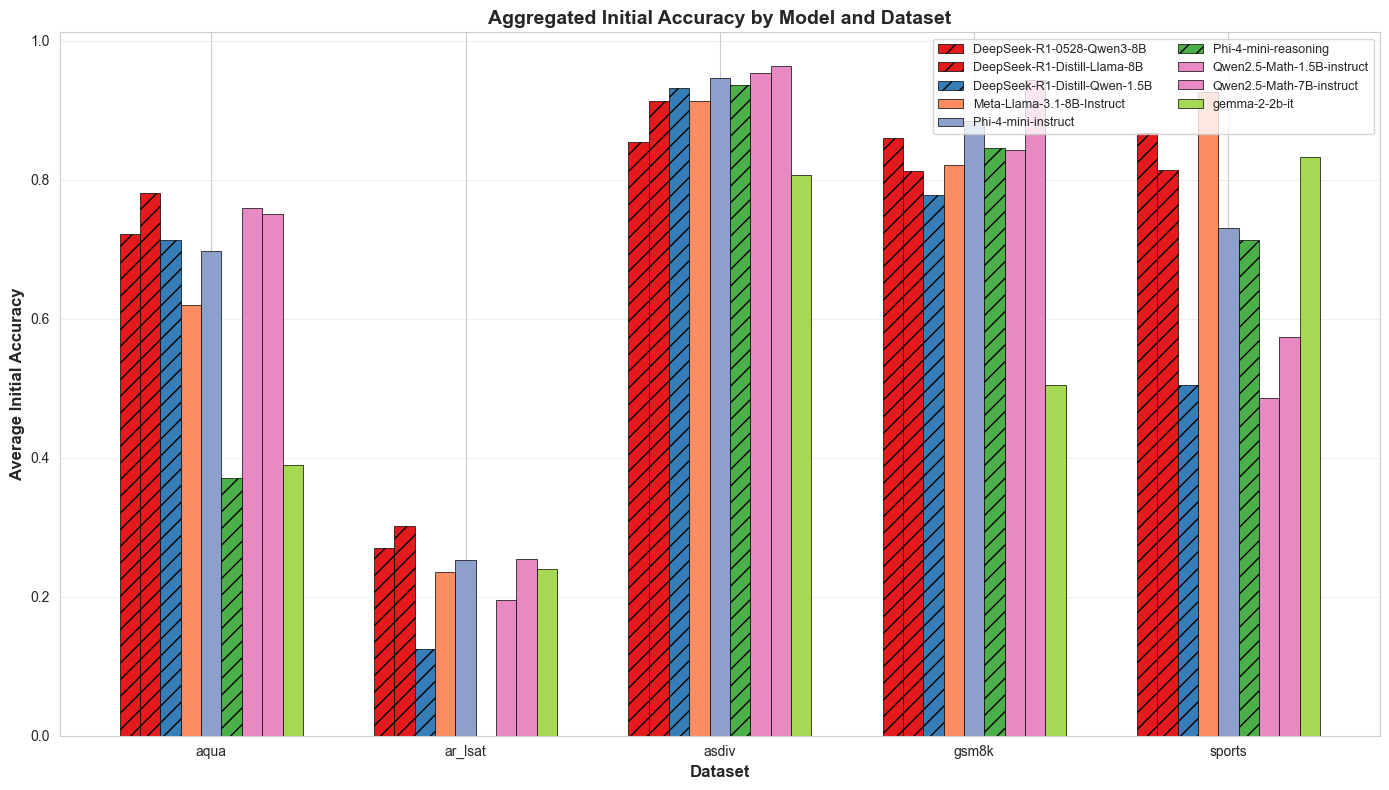

In [10]:
# 5. Aggregated Initial Accuracy - Comparison across models for each dataset
fig, ax = plt.subplots(figsize=(14, 8))

datasets_sorted = sorted(aggregated_data['dataset'].unique())
x = np.arange(len(datasets_sorted))
width = 0.08

models = aggregated_data['model_short'].unique()
colors_reasoning = plt.cm.Set1(np.linspace(0, 0.5, len(models)))
colors_non_reasoning = plt.cm.Set2(np.linspace(0, 0.5, len(models)))

for i, model in enumerate(models):
    model_data = aggregated_data[aggregated_data['model_short'] == model]
    model_category = model_data['model_category'].iloc[0]
    
    accuracies = [model_data[model_data['dataset'] == ds]['initial_accuracy'].values[0] 
                  if len(model_data[model_data['dataset'] == ds]) > 0 else 0 
                  for ds in datasets_sorted]
    
    color = colors_reasoning[i] if model_category == 'Reasoning' else colors_non_reasoning[i]
    hatch = '//' if model_category == 'Reasoning' else None
    
    ax.bar(x + i*width, accuracies, width, label=model, color=color, hatch=hatch, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Initial Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Aggregated Initial Accuracy by Model and Dataset', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(models)-1) / 2)
ax.set_xticklabels(datasets_sorted, rotation=0)
ax.legend(fontsize=9, loc='upper right', ncol=2)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


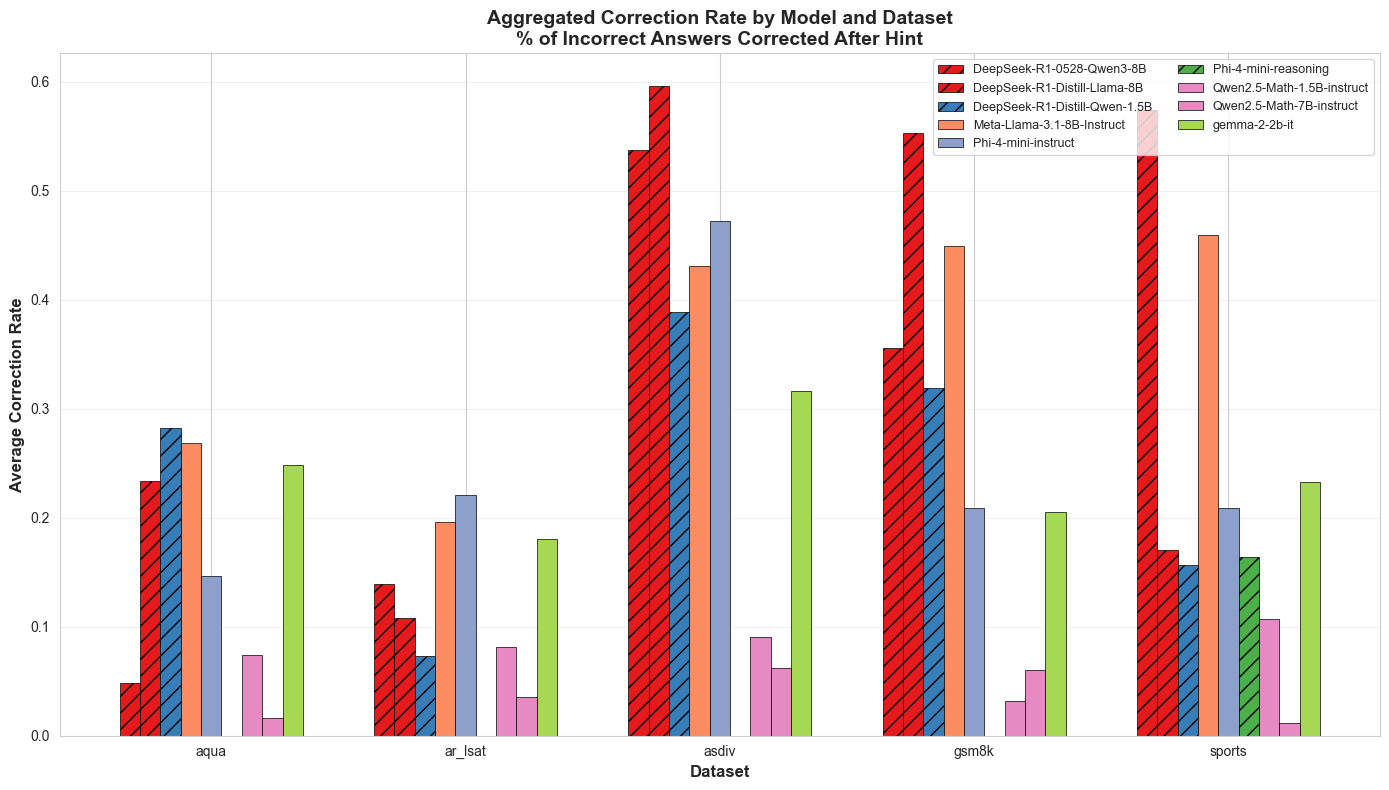

In [11]:
# 6. Aggregated Correction Rate - Comparison across models for each dataset
fig, ax = plt.subplots(figsize=(14, 8))

for i, model in enumerate(models):
    model_data = aggregated_data[aggregated_data['model_short'] == model]
    model_category = model_data['model_category'].iloc[0]
    
    rates = [model_data[model_data['dataset'] == ds]['correction_rate'].values[0] 
             if len(model_data[model_data['dataset'] == ds]) > 0 else 0 
             for ds in datasets_sorted]
    
    color = colors_reasoning[i] if model_category == 'Reasoning' else colors_non_reasoning[i]
    hatch = '//' if model_category == 'Reasoning' else None
    
    ax.bar(x + i*width, rates, width, label=model, color=color, hatch=hatch, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Correction Rate', fontsize=12, fontweight='bold')
ax.set_title('Aggregated Correction Rate by Model and Dataset\n% of Incorrect Answers Corrected After Hint', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(models)-1) / 2)
ax.set_xticklabels(datasets_sorted, rotation=0)
ax.legend(fontsize=9, loc='upper right', ncol=2)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


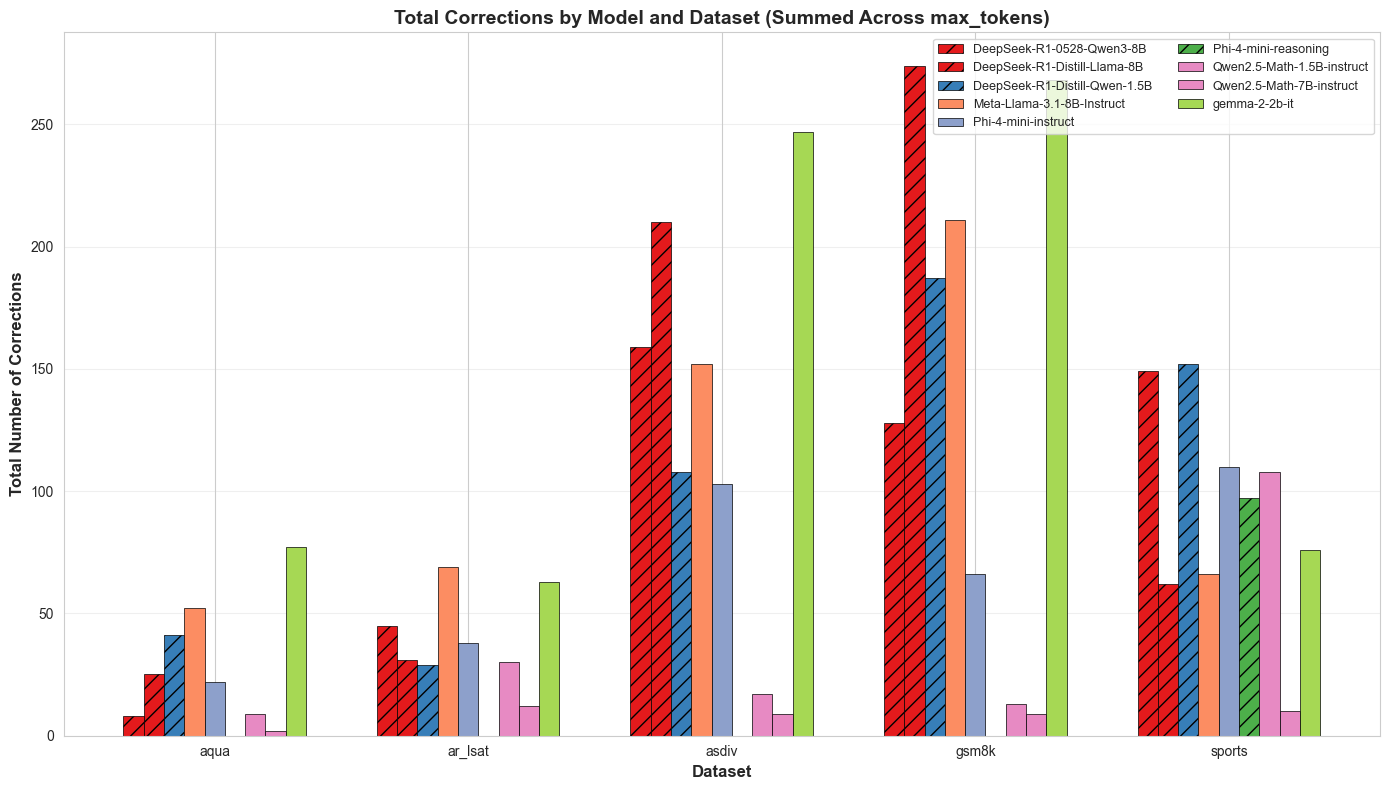

In [12]:
# 7. Total Number of Corrections by Model and Dataset (Aggregated)
fig, ax = plt.subplots(figsize=(14, 8))

for i, model in enumerate(models):
    model_data = aggregated_data[aggregated_data['model_short'] == model]
    model_category = model_data['model_category'].iloc[0]
    
    corrections = [model_data[model_data['dataset'] == ds]['n_corrected_answer'].values[0] 
                   if len(model_data[model_data['dataset'] == ds]) > 0 else 0 
                   for ds in datasets_sorted]
    
    color = colors_reasoning[i] if model_category == 'Reasoning' else colors_non_reasoning[i]
    hatch = '//' if model_category == 'Reasoning' else None
    
    ax.bar(x + i*width, corrections, width, label=model, color=color, hatch=hatch, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Number of Corrections', fontsize=12, fontweight='bold')
ax.set_title('Total Corrections by Model and Dataset (Summed Across max_tokens)', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(models)-1) / 2)
ax.set_xticklabels(datasets_sorted, rotation=0)
ax.legend(fontsize=9, loc='upper right', ncol=2)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


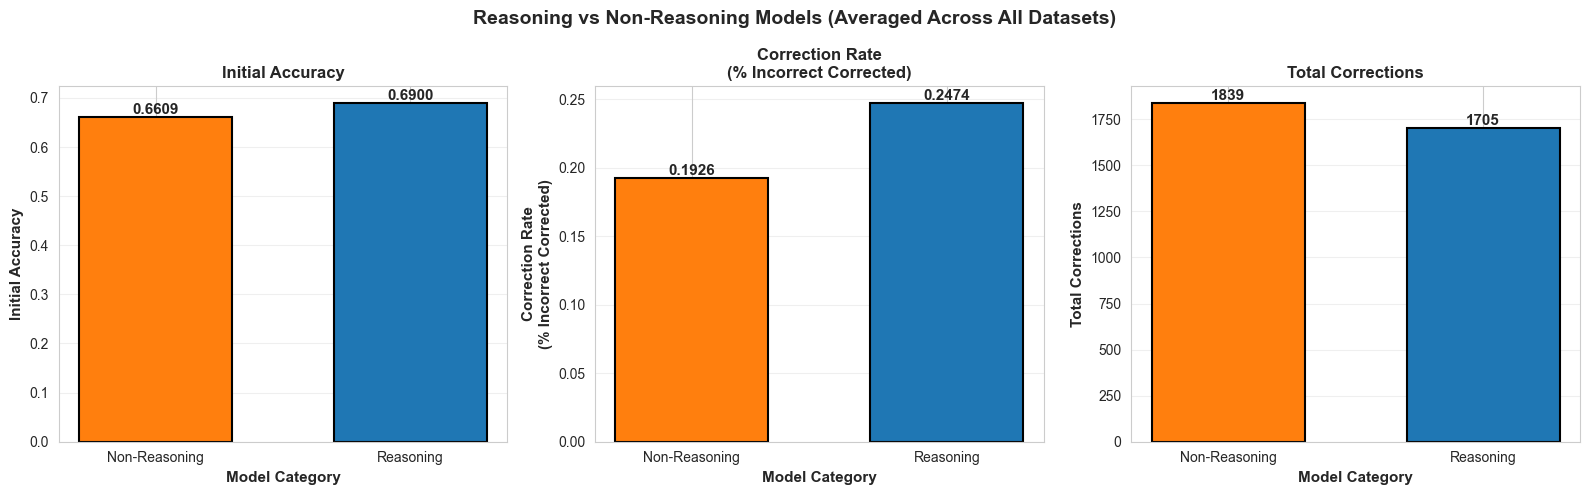

In [13]:
# 8. Model Category Comparison - Reasoning vs Non-Reasoning (Aggregated across all datasets)
category_comparison = aggregated_data.groupby('model_category').agg({
    'initial_accuracy': 'mean',
    'correction_rate': 'mean',
    'n_corrected_answer': 'sum',
    'n_incorrect_answer': 'sum'
}).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Reasoning vs Non-Reasoning Models (Averaged Across All Datasets)', fontsize=14, fontweight='bold')

metrics = ['initial_accuracy', 'correction_rate', 'n_corrected_answer']
titles = ['Initial Accuracy', 'Correction Rate\n(% Incorrect Corrected)', 'Total Corrections']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx]
    categories = category_comparison['model_category']
    values = category_comparison[metric]
    
    bars = ax.bar(categories, values, color=['#ff7f0e', '#1f77b4'], edgecolor='black', linewidth=1.5, width=0.6)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if metric == 'n_corrected_answer':
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
        else:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.4f}',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    ax.set_ylabel(title, fontsize=11, fontweight='bold')
    ax.set_xlabel('Model Category', fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


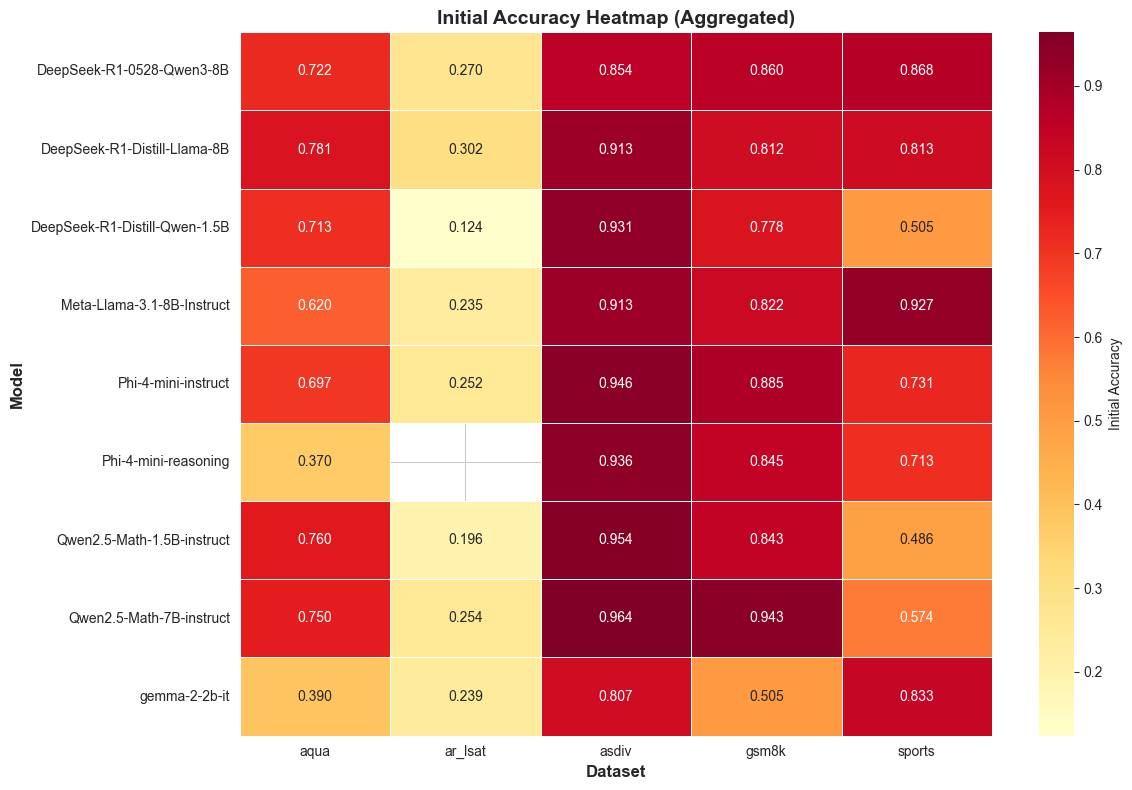

In [14]:
# 9. Heatmap: Initial Accuracy by Model and Dataset (Aggregated)
pivot_initial = aggregated_data.pivot(index='model_short', columns='dataset', values='initial_accuracy')

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pivot_initial, annot=True, fmt='.3f', cmap='YlOrRd', linewidths=0.5, 
            cbar_kws={'label': 'Initial Accuracy'}, ax=ax)
ax.set_title('Initial Accuracy Heatmap (Aggregated)', fontsize=14, fontweight='bold')
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Model', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


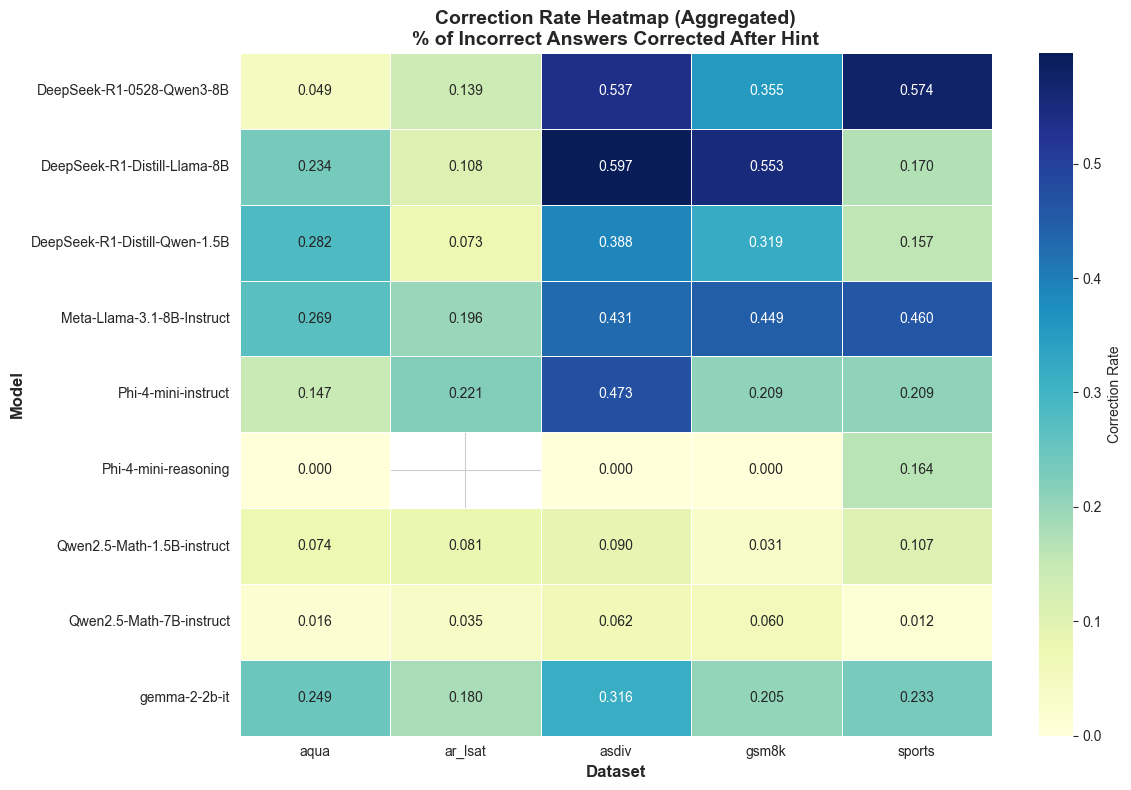

In [15]:
# 10. Heatmap: Correction Rate by Model and Dataset (Aggregated)
pivot_correction = aggregated_data.pivot(index='model_short', columns='dataset', values='correction_rate')

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pivot_correction, annot=True, fmt='.3f', cmap='YlGnBu', linewidths=0.5, 
            cbar_kws={'label': 'Correction Rate'}, ax=ax)
ax.set_title('Correction Rate Heatmap (Aggregated)\n% of Incorrect Answers Corrected After Hint', fontsize=14, fontweight='bold')
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Model', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


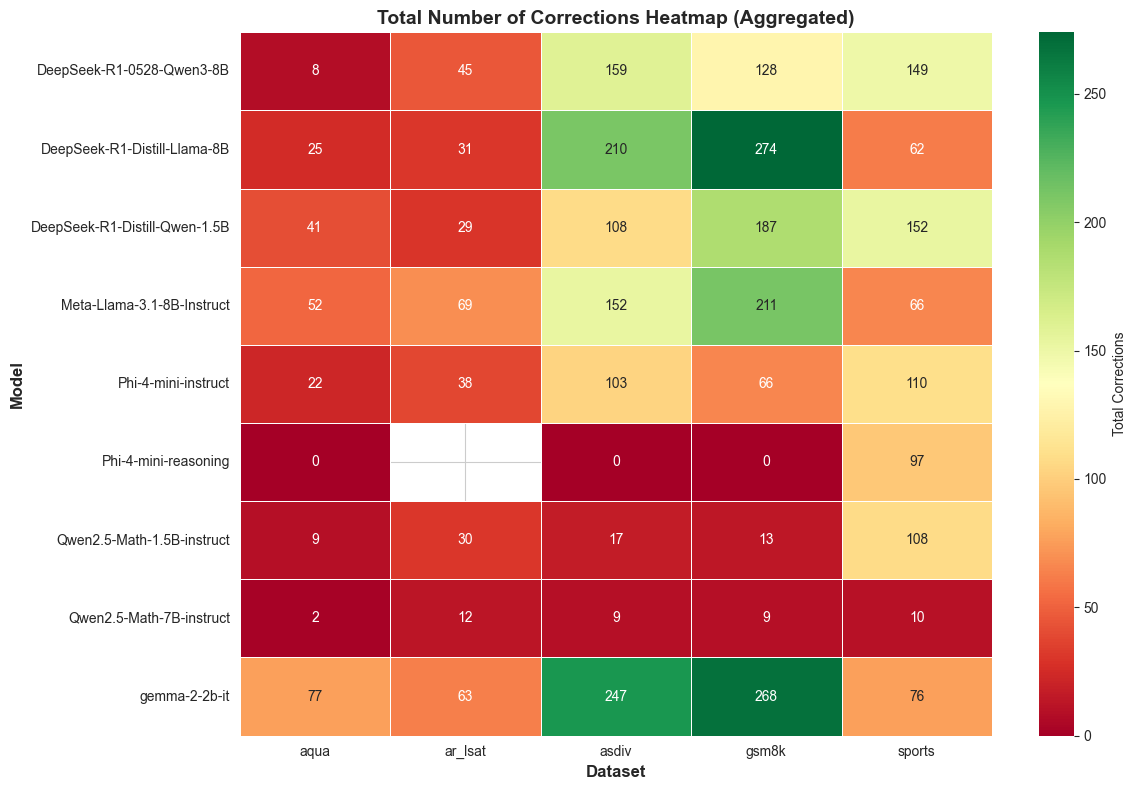

In [16]:
# 11. Heatmap: Total Corrections by Model and Dataset (Aggregated)
pivot_n_corrections = aggregated_data.pivot(index='model_short', columns='dataset', values='n_corrected_answer')

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pivot_n_corrections, annot=True, fmt='.0f', cmap='RdYlGn', linewidths=0.5, 
            cbar_kws={'label': 'Total Corrections'}, ax=ax)
ax.set_title('Total Number of Corrections Heatmap (Aggregated)', fontsize=14, fontweight='bold')
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Model', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


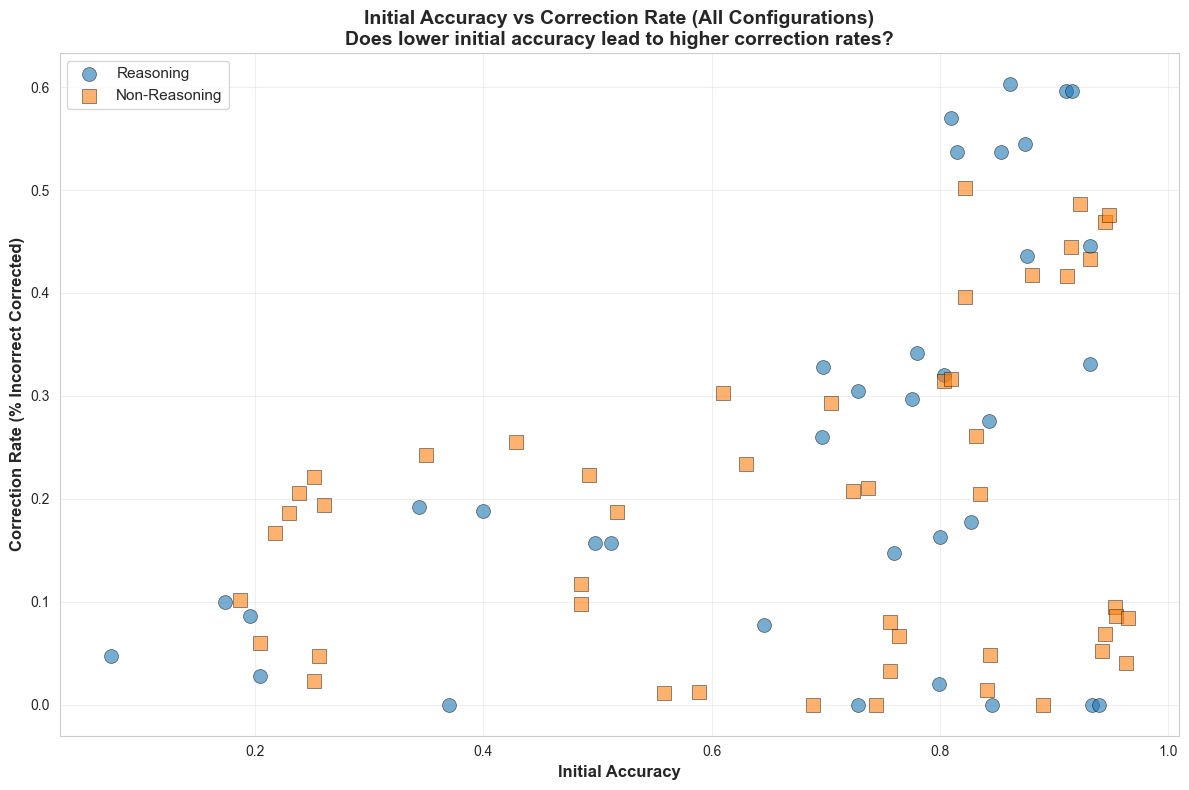

In [17]:
# 12. Scatter Plot: Initial Accuracy vs Correction Rate (All data points)
fig, ax = plt.subplots(figsize=(12, 8))

for category in data['model_category'].unique():
    category_data = data[data['model_category'] == category]
    marker = 'o' if category == 'Reasoning' else 's'
    ax.scatter(category_data['initial_accuracy'], category_data['posthint_accuracy'], 
               label=category, alpha=0.6, s=100, marker=marker, edgecolors='black', linewidth=0.5)

ax.set_xlabel('Initial Accuracy', fontsize=12, fontweight='bold')
ax.set_ylabel('Correction Rate (% Incorrect Corrected)', fontsize=12, fontweight='bold')
ax.set_title('Initial Accuracy vs Correction Rate (All Configurations)\nDoes lower initial accuracy lead to higher correction rates?', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/ct/y9tjcdz561zddxqtsrlssqxc0000gn/T/ipykernel_9607/540242556.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Non-Reasoning', 'Reasoning'], patch_artist=True,
/var/folders/ct/y9tjcdz561zddxqtsrlssqxc0000gn/T/ipykernel_9607/540242556.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Non-Reasoning', 'Reasoning'], patch_artist=True,
/var/folders/ct/y9tjcdz561zddxqtsrlssqxc0000gn/T/ipykernel_9607/540242556.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Non-Reasoning', 'Reasoning'],

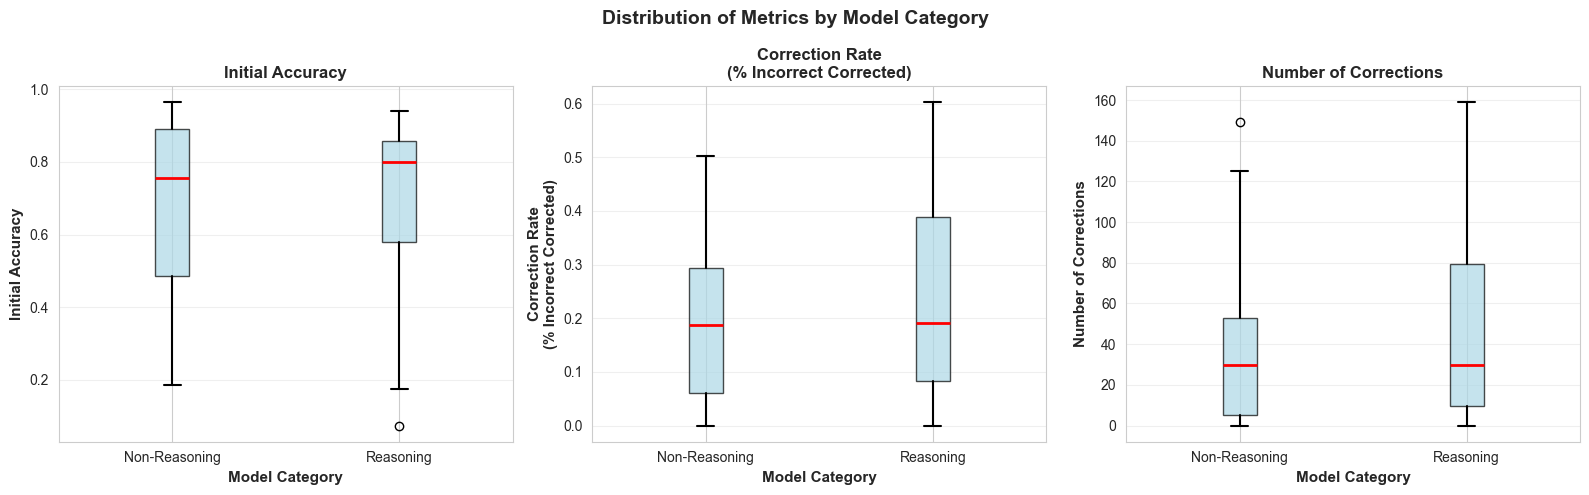

In [18]:
# 13. Box Plot: Distribution of metrics by model category
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Distribution of Metrics by Model Category', fontsize=14, fontweight='bold')

metrics_box = [
    ('initial_accuracy', 'Initial Accuracy'),
    ('posthint_accuracy', 'Correction Rate\n(% Incorrect Corrected)'),
    ('n_corrected_answer', 'Number of Corrections')
]

for idx, (metric, title) in enumerate(metrics_box):
    ax = axes[idx]
    data_to_plot = [data[data['model_category'] == cat][metric].values for cat in ['Non-Reasoning', 'Reasoning']]
    
    bp = ax.boxplot(data_to_plot, labels=['Non-Reasoning', 'Reasoning'], patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(linewidth=1.5),
                    capprops=dict(linewidth=1.5))
    
    ax.set_ylabel(title, fontsize=11, fontweight='bold')
    ax.set_xlabel('Model Category', fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
